<a href="https://colab.research.google.com/github/zilves27/PUC/blob/main/PUC_MVP_Sprint_I_An%C3%A1lise_Explorat%C3%B3ria_e_Pr%C3%A9_Processamento_Corrente_Com%C3%A9rcio_Internacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP 1 - Análise Exploratória e Pré-Processamento - Corrente Comércio Internacional**

#**1 - Definição do problema**

O problema consiste em realizar uma análise diagnóstica da Corrente de Comércio do Brasil (exportações e importações) nos últimos 25 anos, traçando também um paralelo da sua representatividade em relação ao PIB do país. A escolha do tema se deu pelo fato que a corrente de comércio é algo extremamente importante, pois avalia a inserção do país no cenário econômico internacional. O paralelo com o PIB traz mais outras duas análises importantes, sendo a primeira para entender qual a representatividade da corrente de comércio no PIB e uma segunda para avaliar se há alguma correlação entre os dados. Essas análises sobre o Comércio Internacional são importantes, pois economias emergentes, como é o caso do Brasil, devem alavancar cada vez essa força motriz de economia, no intuito de expandir seu crescimento, haja vista que nem sempre o próprio país possui capacidade suficiente para consumir tudo o que se produz.

O dataset escolhido é de certa forma pequeno, contendo relatos dos últimos 25 anos, como consequência há um limite para 25 linhas, contendo uma seleção de 4 atributos, todos escolhidos tecnicamente e de forma direta com o assunto no qual está sendo abordado. Os atributos escolhidos foram Exportação, Importação, Corrente Comex e PIB. A seguir um detalhamento do que é cada um deles:
    
    ANO – mostra o ano de referência dos dados;
    EXPORTAÇÃO – traz os valores exportados em USD (bilhões) pelo país no ano de referência;
    IMPORTAÇÃO – traz os valores importados em USD (bilhões) pelo país no ano de referência;
    CORRENTE COMEX – essa é a Corrente de Comércio do país, onde é a soma dos valores de exportação e importação em USD (bilhões) no período de referência;
    PIB – o Produto Interno Bruto (PIB) é a soma de tudo o que é produzido por um país, envolvendo não só produção direta, mas também prestação de serviços remunerados. Através do PIB é que se mede a riqueza de um país. Os valores apresentados estão em USD (bilhões);

Como destacado no detalhamento dos dados, todos os campos de valores estão em USD, que é a moeda Dólar dos Estados Unidos, pois é a moeda globalmente utilizada para parâmetros métricos econômicos. Isso ajuda bastante, pois de modo geral já traz uniformidade para os reports de todos os dados dos países. Além disso, os mesmo estão apresentados na casa dos bilhões de dólares seguindo uma boa prática, de modo que os números sejam mais fáceis de serem lidos e interpretados posteriormente

Os dados apresentados foram extraídos de fontes reconhecidas internacionalmente, o que traz uma confiança maior para os números apresentados.
Os dados de Exportação, Importação e Corrente Comex foram todos extraídos do site oficial do governo brasileiro para assuntos relacionados as operações de comércio internacional, que é o Comex Stat. Já os dados de PIB foram extraídos do World Bank, conhecido aqui no Brasil como Banco Mundial, que é uma instituição financeira renomada, na qual atua principalmente no auxílio aos país em desenvolvimento, com financiamentos de projetos para alavancar o crescimento da economia dos mesmos.



In [64]:
pip install pandas seaborn statsmodels


In [65]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# **2 - Preparação dos dados**

Os dados foram carregados através de um arquivo CSV, disponibilizados para conferência no próprio Github através da URL presente no código.


In [66]:
# Carregar os dados do arquivo CSV
url = "https://raw.githubusercontent.com/zilves27/PUC/main/corrente_comercio.csv"
df = pd.read_csv(url, delimiter=';')

# Visualizar as primeiras linhas do DataFrame
print(df.head())

    ANO  EXPORTAÇÃO  IMPORTAÇÃO  CORRENTE COMEX      PIB
0  2022      334.14      272.61          606.75  1920.10
1  2021      280.81      219.41          500.22  1649.62
2  2020      209.18      158.79          367.97  1476.11
3  2019      221.13      185.93          407.05  1873.29
4  2018      231.89      185.32          417.21  1916.93


# **3 - Análise dos Dados - Avaliar**

**3.1 - Estatística Descritiva**

In [67]:
# Analisar Dimensão do DataFrame
print(df.shape)

(25, 5)


  Ação executada apenas no intuito de validar o conhecimento, uma vez que já havia sindo informado que essa análise teria como base a Corrente de Comércio de Brasil nos últimos 25 anos.

In [68]:
# Mostra as informações do dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ANO             25 non-null     int64  
 1   EXPORTAÇÃO      25 non-null     float64
 2   IMPORTAÇÃO      25 non-null     float64
 3   CORRENTE COMEX  25 non-null     float64
 4   PIB             25 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.1 KB
None


  Podemos constatar que não há valores nulos no dataset, além de serem todos dados numéricos. De fato isso já era esperado, uma vez que estamos lidando com dados oficiais do governo, o que não permite valores diferentes de números e tampouco nulos. De qualquer modo, foi mais uma ação executada para validação de conhecimento e comprovação do que já era esperado.

In [69]:
# Mostra as todas as linhas do dataset
df.head(25)

,ANO,EXPORTAÇÃO,IMPORTAÇÃO,CORRENTE COMEX,PIB
0,2022,334.14,272.61,606.75,1920.10
1,2021,280.81,219.41,500.22,1649.62
2,2020,209.18,158.79,367.97,1476.11
3,2019,221.13,185.93,407.05,1873.29
4,2018,231.89,185.32,417.21,1916.93
5,2017,214.99,158.95,373.94,2063.51
6,2016,179.53,139.32,318.85,1795.69
7,2015,186.78,173.10,359.89,1802.21
8,2014,220.92,230.82,451.75,2456.04
9,2013,232.54,241.50,474.05,2472.82


  Por ser um dataset pequeno, não faria sentido mostrar algumas linhas do início e outras do final. Desse modo, otimizamos etapas, enxugando o código, mas também reafirmando que é sim de conhecimento como uma boa prática a exibição de algumas linhas do dataset como exemplo de visualização.

In [70]:
# Calcular dados básicos para uma análise descritiva, tais como média, desvio padrão, mínimo, máximo e quartis
df.describe()

,ANO,EXPORTAÇÃO,IMPORTAÇÃO,CORRENTE COMEX,PIB
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,2010.000000,168.384400,143.178800,311.564000,1515.675200
std,7.359801,80.512901,71.924493,151.035825,692.637912
min,1998.000000,47.950000,48.270000,98.210000,509.800000
25%,2004.000000,95.120000,63.810000,158.940000,863.710000
50%,2010.000000,186.780000,158.790000,359.890000,1667.000000
75%,2016.000000,221.130000,185.930000,417.210000,1920.100000
max,2022.000000,334.140000,272.610000,606.750000,2616.160000


  Desconsiderando a coluna ano e a quantidade de linhas, os demais dados apresentados trazem informações relevantes para nossa análise.
  
  Podemos ver que média e mediana estão relativamente próximas, com variações em torno de 10%-16% entre si. O fato de termos a mediana sendo superior a média e todos os itens poderia indicar que teríamos valores menores à direita caso fosse feita uma distribuição normal.
  
  Quando pegamos o desvio padrão percebemos que os dados possuem uma grande dispersão (ou variabilidade). O que para uma análise estatística seria muito ruim, porém no tema analisado isso é muito bom, pois demonstra sinais de evolução ao longo dos anos.

  Quando pegamos mínimo e máximo podemos comprovar o fato do desvio padrão ser tão alto, pois temos casos onde mostra que há uma diferença de quase 600%, como no caso das exportações, com o mínimo sendo de USD 47,95 bilhões e o máximo USD 334,14 bilhões. Estatiscamente falando, poderia ser muito ruim ter que trabalhar com dados assim, porém economicamente esses dados são muito bons.

  Vale destacar que para esse caso não agregaria em nada fazermos uma destribuição normal, pois temos outros tipos de gráficos para mostrar os dados de forma que os torne mais relevantes para nossa análise. A ideia principal aqui foi interpretar os dados descritivos apresentados, traçando um paralelo com a estatística e a visão de mercado do tema.

**3.2 - Análise Exploratória**

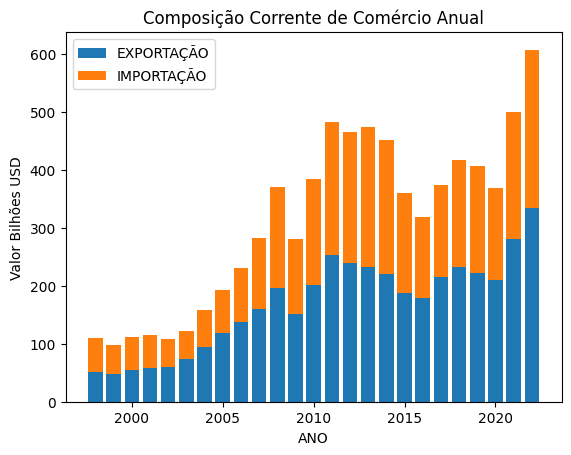

In [71]:
# Gráfico de barras empilhadas com Exportação e Importação, representando assim a Corrente de Comércio

plt.bar(df['ANO'], df['EXPORTAÇÃO'], label='EXPORTAÇÃO')
plt.bar(df['ANO'], df['IMPORTAÇÃO'], bottom=df['EXPORTAÇÃO'], label='IMPORTAÇÃO')
plt.xlabel('ANO')
plt.ylabel('Valor Bilhões USD')
plt.title('Composição Corrente de Comércio Anual')
plt.legend()
plt.show()

Nesse gráfico podemos ver que a Corrente de Comércio do Brasil vem evoluindo quase que de forma constante ao longo dos anos, tendo seu ápice no ano de 2022. Nesse período vemos que os números saltaram de pouco mais 100 bilhões para mais de 600 bilhões, representando um aumento em torno de 500%.

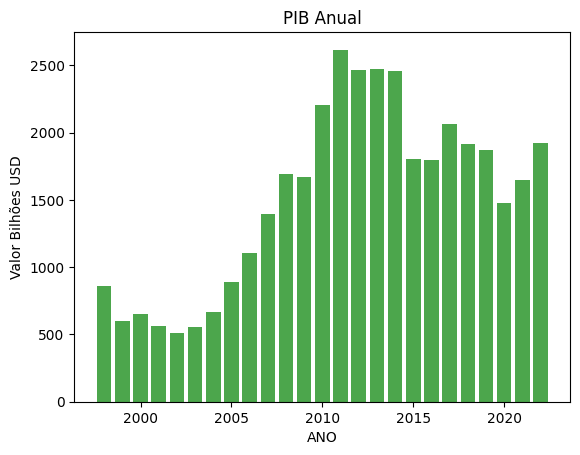

In [72]:
# Gráfico de barras empilhadas com Exportação e Importação, representando assim a Corrente de Comércio

plt.bar(df['ANO'], df['PIB'], color='green', alpha=0.7)

plt.xlabel('ANO')
plt.ylabel('Valor Bilhões USD')
plt.title('PIB Anual')

plt.show()

   Nesse caso podemos ver que o PIB teve uma pequena queda a partir do primeiro ano de nossa análise, chegando ao menor valor no ano de 2002, quando começou a escalada até a chegada de seu ápice em 2011, com algo superior aos USD 2,5 trilhões. Daí, ele começa um período de queda, onde vemos uma pequenas oscilações e fechando o ano de 2022 com patamares de 2018, com algo superior aos USD 1,9 trilhões.

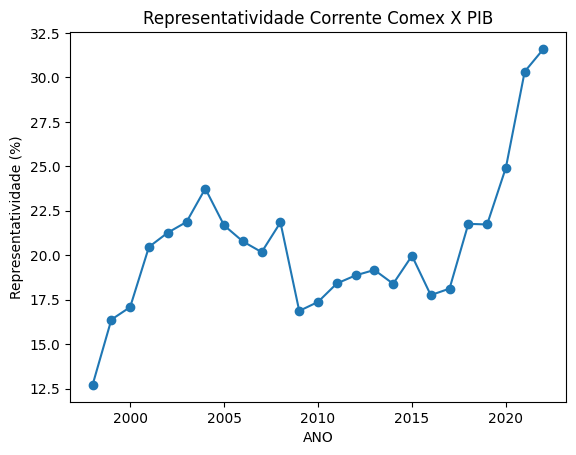

In [73]:
# Representatividade da Corrente de Comex X PIB

df['Representatividade'] = (df['CORRENTE COMEX'] / df['PIB']) * 100

plt.plot(df['ANO'], df['Representatividade'], marker='o', color='#1f77b4', label='Representatividade CORRENTE COMEX')

plt.xlabel('ANO')
plt.ylabel('Representatividade (%)')
plt.title('Representatividade Corrente Comex X PIB')

plt.show()

  Nesse gráfico podemos ver a representatividade da Corrente de Comércio em comparação com o PIB, onde ela apresentou um crescimento importante nos primeiros anos, praticamente dobrando sua participação até no ano de 2004, depois seguida por algumas quedas, quando por volta de 2017 ela começou a se consolidar e voltar a crescer, atingido seu ápice no ano de 2022, mesmo ano no qual a Corrente de Comércio atingiu seu teto.

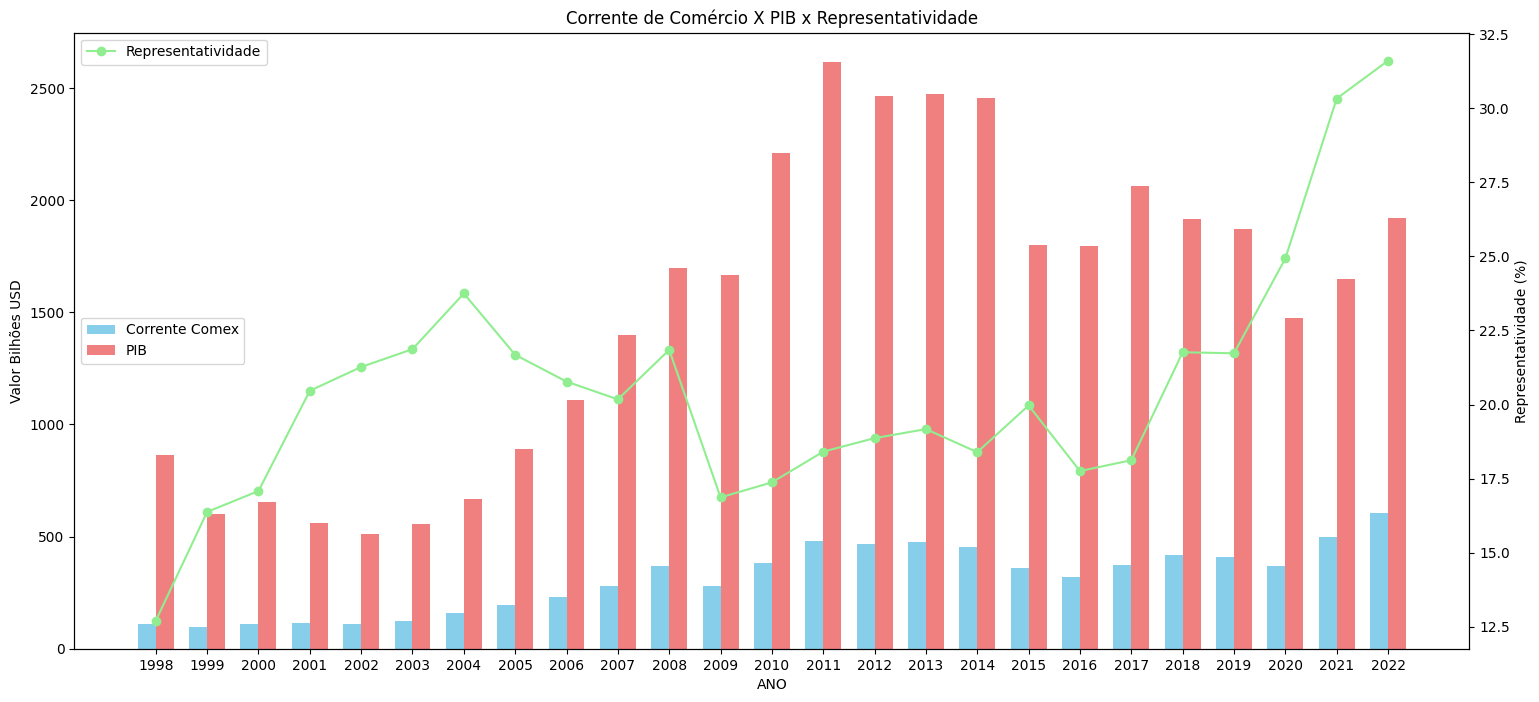

In [74]:
# Gráfico para mostrar a Corrente de Comex X PIB, juntamente com a representatividade contra o outro

  # Por ser uma gráfico com várias informações será importante que os dados sejam bem dispostos, sem que haja uma poluição visual

    # Configurar posições no eixo x para barras paralelas
df = df.sort_values(by='ANO')
posicoes_ano = np.arange(len(df['ANO']))
largura_barra = 0.35

    # Ajustar a área de plotagem, considerando o total de dados a serem visualizados, seguindo as boas práticas de dataviz
fig, ax1 = plt.subplots(figsize=(18, 8))

ax1.bar(posicoes_ano - largura_barra/2, df['CORRENTE COMEX'], width=largura_barra, label='Corrente Comex', color='skyblue')
ax1.bar(posicoes_ano + largura_barra/2, df['PIB'], width=largura_barra, label='PIB', color='lightcoral')

ax1.set_xlabel('ANO')
ax1.set_ylabel('Valor Bilhões USD', color='black')  # Rótulo do eixo Y

ax2 = ax1.twinx()
ax2.plot(posicoes_ano, df['Representatividade'], marker='o', color='lightgreen', label='Representatividade')

ax2.set_ylabel('Representatividade (%)', color='black')  # Rótulo do segundo eixo Y
ax2.set_title('Corrente de Comércio X PIB x Representatividade')

    #Adicionar e posicionar legendas para ambos os eixos
ax1.legend(loc='center left')
ax2.legend(loc='upper left')

ax1.set_xticks(posicoes_ano)
ax1.set_xticklabels(df['ANO'])


plt.show()

Nesse gráficos conseguimos visualizar no início de nossa série histórica a participação da Corrente de Comércio do Brasil era algo pouco superior as 10% do PIB, porém foi gradativamente crescendo e praticamente dobrando representatividade até o ano de 2004, quando podemos perceber algumas oscilações até 2016, quando esse cenário muda e passamos a ter um aumento constante, chegando ao seu ápice no ano de 2022.

In [75]:
# Verificar a correlação entre as colunas numéricas e "PIB" utilizando uma biblioteca diferente, que nesse caso foi a NumPy

correlacao_comex_pib = np.corrcoef(df['CORRENTE COMEX'], df['PIB'])[0, 1]

print("Correlação entre 'CORRENTE COMEX' x 'PIB':", correlacao_comex_pib)


Correlação entre 'CORRENTE COMEX' x 'PIB': 0.8992899048117309


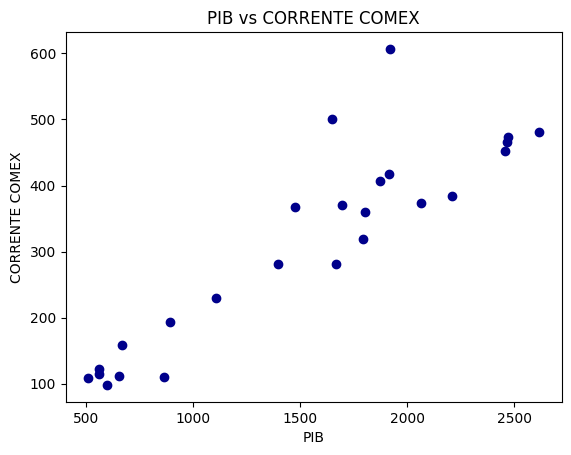

In [76]:
# Gráfico de dispersão entre PIB e Corrente Comex
plt.scatter(df['PIB'], df['CORRENTE COMEX'], color='darkblue', marker='o', label='PIB vs CORRENTE COMEX')

plt.xlabel('PIB')
plt.ylabel('CORRENTE COMEX')
plt.title('PIB vs CORRENTE COMEX')

plt.show()

  Podemos ver que existe uma correlação positiva forte entre as variáveis Corrente de Comércio e PIB, onde chega próximo aos 0.90.

# **4 - Pré-processamento de Dados**

A etapa de Pré-Processamento de dados é em geral aquela que mais toma o nosso tempo ao trabalhar com dados, principalmente pelo fato de que muitas vezes as bases de dados não estão "perfeitas", contendo valores faltantes ou nulos, ou até mesmo dados inconsistentes. Nessa nossa base não temos esse tipo e problemas, uma vez que os dados utilizados são todos dados oficiais e não podem conter erros.

Qualquer operação como balanceamento, limpeza ou seleção de atributos dos dados não agregariam valor para esse trabalho em si. Algumas outras etapdas de pré-processamento já foram realizadas em outros projetos, como esse do link https://github.com/zilves27/PUC/blob/main/PUC_MVP_Sprint_II_ML_Valor_Chapa_KG.ipynb.

Apenas reforçando que o fato de não termos etapas de pré-processamento nesse projeto não quer dizer que seja uma etapa desnecessária, apenas que os dados apresentados não necessitariam esse tipo de processo e que se fossem feitos, apenas encheriam o código e não agregariam valor para o que é mais importante, que nesse caso seriam as análises.


# **5 - Conclusão**

Antes de tudo, acredito que tem que ser reforçado mais uma vez que a moeda adotada para expressar os números foi o Dólar do Estados Unidos, que é uma espécie de moeda padrão para divulgação de números da economia ao redor do mundo. No Brasil é adotado o câmbio flutuante, que é quando a moeda vai sofrendo alterações conforme reação do mercado. Com isso, sabe-se que o Real tem perdido muito valor ao longo dos anos perante outras moedas, principalmente ao Dólar. Tendo isso em vista, os números de PIB e Corrente de Comércio podem até ter apresentado números diferentes se analisados na moeda local, porém a ideia é seguir a mesma linha de pesquisa que os demais que acompanham esse segmento. Prova disso é que o PIB do ano de 2022 fechou como recorde na moeda local, em torno de 10 trilhões de Reais, contudo em nível de Dólar, o valor ficou no mesmo patamar de 2018, quando em Reais o PIB fechou em cerca de 6,8 trilhões. Desde 2020 o Brasil vem sofrendo demais com a desvalorização de sua moeda, principalmente em função da pandemia, onde muitos ficaram receosos do que poderia acontecer em função da recessão global e preferiram se “garantir” em moedas mais fortes. Vemos aqui um exemplo claro de que outros fatores podem sim influenciar numa análise do processo e não poderíamos ter uma verdade absoluta olhando apenas para os aspectos apresentados. Talvez incluindo uma análise sobre o câmbio fosse possível traçar um paralelo sobre a influência nos valores apresentados, porém daí teríamos que avaliar outras variáveis que influenciam a oscilação do câmbio e acabaríamos por ter uma sequência de análises sem fim, e pior ainda, sem podermos realizar uma Análise Exploratória básica dos números apresentados.

Tendo isso em vista, conseguimos destacar aqui a importância de uma das áreas de conhecimento do Cientista de Dados, que é o “Conhecimento do Negócio”, pois entender do negócio ajuda a tirar qualquer tipo de viés da análise e tentar interpretar os números de maneira mais.

Seguindo com a conclusão, destaco que a Corrente de Comércio é de suma importância para economia, pois mostra como o país consegue relacionar comercialmente com os outros países. Considerando um mundo globalizado, como é atualmente, ter um desempenho evolutivo durante o período é sim para se destacar, mesmo que ele sofra com as oscilações do câmbio, os números se mostraram bem positivos, mostrando que o Brasil tem crescido nessa área.

Vimos também que o PIB possui uma curva de oscilação bem maior que a da Corrente de Comex, tendo atingido seu teto num período bem diferente, sendo em 2011. Apesar de que como explicado acima o valor máximo na moeda local foi em 2022, os valores na moeda Dólar é que estão sendo analisados.

Em relação a representatividade da Corrente de Comex em relação ao PIB vimos que o Brasil teve sua melhor marca no ano de 2022, com uma marca superior a 30%. Esse número não é ruim, uma vez que já representou bem menos, porém ainda estamos distantes das grandes economias globais, onde esse número em muitos os casos superam os 50%, tendo situações mais pontuais e marcantes como da China, onde a Corrente de Comércio representa algo em torno de 65% do PIB. Estamos evoluindo sim, mas temos um longo caminho a ser percorrido até conseguirmos chegar nos níveis internacionais.

Um outro destaque, onde mais uma vez poderemos comprovar a importância do “Conhecimento do Negócio” como fator diferencial para o Cientista de Dados é no campo de correlação entre Corrente de Comex e PIB. Como visto, o valor atingido nessa análise foi em torno de 0.90, o que nos remete a uma correlação positiva forte. Olhando apenas a parte estatística, podemos ver que são valores relevantes para nossa análise e poderia ser criado um mundo de maravilhas com esse dado. Contudo, tendo em vista o conhecimento do negócio, esse tipo de correlação já era esperado. De fato, podemos afirmar que há uma causalidade nesse aspecto, uma vez que como já explicado o PIB é a soma de todas as riquezas produzidas pelo país e a Corrente de Comex é composta pela soma de Exportação e Importação, onde Exportação, de forma bem simplória, é a venda de produtos para outros países. Sendo assim, só se pode exportar o que já foi produzido e se já foi produzido, entre no cálculo do PIB. Sim, pode parecer meio estranho, mas a ideia é tentar explicar de forma simples e direta para aqueles não possuem total conhecimento sobre o assunto e não apenas querer impressionar mostrando um resultado e querer fazer festa em cima dele.

Finalizando, vemos que o que foi proposto na etapa de “Definição do Problema” foi respondido, tanto ao longo das etapas do projeto, quanto com o que foi destacado na etapa de “Conclusão”. Um detalhamento robusto, interpretando em detalhes os dados apresentados e dando uma visão sobre como não se iludir ou querer interpretar um dado de forma enviesada.
